# 선형 회귀분석모델2
# Predicting house prices in Boston area
## 살펴보기 & 정리

참고: [Predicting house prices in Boston area](http://aqibsaeed.github.io/2016-07-07-TensorflowLR/) <br>
github주소: [aqibaeed/Tensor-ML](https://github.com/aqibsaeed/Tensorflow-ML/blob/master/Linear%20Regression.ipynb)<br>

* Model : linear regression 모델
* Data : load_boston (from sklearn.datasets)<br>
[sklearn.datasets.load_boson](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)<br>
[github_sourcecode](https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/datasets/base.py#L652)<br>
[Dataset loading utilities](http://scikit-learn.org/stable/datasets/index.html)<br>
[boston_house_prices.csv](https://github.com/scikit-learn/scikit-learn/tree/a24c8b464d094d2c468a16ea9f8bf8d42d949f84/sklearn/datasets/data)<br>
[boston_house_prices.rst](https://github.com/scikit-learn/scikit-learn/blob/a24c8b464d094d2c468a16ea9f8bf8d42d949f84/sklearn/datasets/descr/boston_house_prices.rst)

data desc
```
Attribute Information (in order):	
CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per $10,000
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT % lower status of the population
MEDV Median value of owner-occupied homes in $1000's
```

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.node_ast_interactivity='all'

In [12]:
import tensorflow as tf
import numpy as np

#  dataset 준비
<hr>
## 1. data 살펴보기
예제에서 나온 데이터로는 아직 감이 잡히지 않으므로 data에 대해서 이해가 필요할 것 같다.
### (1) scikit-learn의 boston data
```
return Bunch(data=data,
                 target=target,
                 # last column is target value
                 feature_names=feature_names[:-1],
                 DESCR=descr_text)
```
### (2) sklearn data 살펴보기
**참고 페이지**: [sklearn_bostondata](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

```
data : Bunch

Dictionary-like object, the interesting attributes are: ‘data’, the data to learn, ‘target’, the regression targets, and ‘DESCR’, the full description of the dataset.
```

In [24]:
from sklearn import datasets

In [44]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data)
print(boston.data.shape)
print(boston.keys())
print(boston.feature_names)
# print(boston.DESCR)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)
dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


# 데이터 다루기
<hr>
## 2. Numpy 이용한 데이터 다루기
<hr>
### (1) numpy 이용해서 data 살펴보기
### (2) numpy 이용해서 linear regression 분석 따라하기
참고페이지: [# Predicting house prices in Boston area, #linear_regression, #numpy, #sklearn](http://aqibsaeed.github.io/2016-07-07-TensorflowLR/)

#### data를 array로

In [122]:
import tensorflow as tf
import numpy as np
from sklearn import datasets

In [123]:
def read_boston_data():
    boston = datasets.load_boston()
    features = np.array(boston.data)
    labels = np.array(boston.target)
    return features, labels

In [124]:
features, labels = read_boston_data()
print(features)
print(labels)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

참고페이지 : [preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)
<br>
참고페이지 : [housing_tutorial](http://www.neural.cz/dataset-exploration-boston-house-pricing.html)

#### data normalized

In [125]:
def feature_normalize(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu) / sigma

In [126]:
normalized_features = feature_normalize(features)

#### data 새로 구성하기

In [127]:
def append_bias_reshape(features, labels):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    # y축으로 column을 하나 추가하고, 추가된 값을 포함, 506 * 14로 바꾼다.
    f = np.reshape(np.c_[np.ones(n_training_samples), features], [n_training_samples, n_dim + 1])
    # Y 즉, 결과를 506*1 로 만든다.
    l = np.reshape(labels, [n_training_samples, 1])
    return f, l

In [128]:
print(features.shape[0]) # instance가 506 (row의 총 갯수)
print(features.shape[1]) # feature가 13 (=columns)

506
13


In [129]:
print(features) # x가 들어있다. 
# 13개의 feature를 가진 506개의 data

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [130]:
print(np.c_[np.ones(506), features])
# 맨 앞에 features에 컬럼 하나를 더 더했다. 

[[1.0000e+00 6.3200e-03 1.8000e+01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [1.0000e+00 2.7290e-02 0.0000e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [1.0000e+00 6.0760e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0000e+00 1.0959e-01 0.0000e+00 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [1.0000e+00 4.7410e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [131]:
# 506 * 14 배열로 바꾼다.
print(np.reshape(np.c_[np.ones(506), features], [506,(13+1)] ))

[[1.0000e+00 6.3200e-03 1.8000e+01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [1.0000e+00 2.7290e-02 0.0000e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [1.0000e+00 6.0760e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0000e+00 1.0959e-01 0.0000e+00 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [1.0000e+00 4.7410e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [132]:
print(labels.shape)

(506,)


In [133]:
# x값들이 들어 있는, normalized_feature는  506*14 배열
# y결과값들이 들어있는, labels는 506 * 1
f, l = append_bias_reshape(normalized_features, labels)
n_dim = f.shape[1]
print(n_dim)
print(len(f))

14
506


#### testing data와 traing data 나누기
#### 난수 발생과 카운팅
**seed설정: **컴퓨터 프로그램에서 발생하는 무작위 수는 사실 엄격한 의미의 무작위 수가 아니다. 어떤 특정한 시작 숫자를 정해주면 컴퓨터가 정해진 알고리즘에 의해 마치 난수처럼 보이는 수열을 생성한다. <br>
이런 시작 숫자를 시드(seed)라고 한다. <br>
특정한 seed값이 사용되면 그 다음에 만들어지는 난수들을 모두 예측할 수 있다. 즉, 코드의 결과를 재현하기 위해 항상 시드를 설정할 수 있다. <br>
참고페이지: [데이터사이언스스쿨_난수발생](https://datascienceschool.net/view-notebook/8bf41f87a08b4c44b307799577736a28/)

In [134]:
randf = np.random.rand(len(f))
print(len(f))
print(randf)

506
[0.731618   0.91601032 0.89242113 0.54432666 0.03450557 0.67021219
 0.14868593 0.37000217 0.10065521 0.64997383 0.50663655 0.93566551
 0.25989953 0.11848313 0.31109417 0.94760215 0.78671614 0.71706365
 0.51950693 0.36563883 0.96417192 0.54393606 0.70555932 0.78326546
 0.803439   0.26123699 0.83120635 0.78370103 0.36123355 0.33121087
 0.53989652 0.13767282 0.63649757 0.84708775 0.21399703 0.04864074
 0.18147744 0.09999593 0.45461319 0.24979277 0.02780538 0.46249344
 0.95603422 0.45859987 0.8276846  0.46525389 0.48609806 0.77720707
 0.34173724 0.82030722 0.66104515 0.1495149  0.93210766 0.74246421
 0.16610785 0.04912223 0.1879993  0.91138696 0.98316985 0.67587497
 0.12481583 0.70478058 0.10116998 0.98452003 0.57427219 0.32956059
 0.4643874  0.19245192 0.18084382 0.84523774 0.87256774 0.85314339
 0.75549411 0.38742701 0.79355571 0.1051378  0.00818064 0.75531268
 0.25997883 0.87740011 0.94632702 0.63177114 0.77171915 0.51823274
 0.40594752 0.27571859 0.06545163 0.1250578  0.5932596  0.

In [135]:
rnd_indices = np.random.rand(len(f)) < 0.80
print(rnd_indices[8])
print(rnd_indices)

True
[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True False  True  True  True  True  True False  True  True
 False  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
 False False  True  True  True  True  True  True  True False  True False
  True False False  True False  True  True  True False False  True False
 False  True  True False  True False  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False  True  True  True  True False False  True  True False
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
 False  True False  True False  True False  Tr

#### training 데이터와 test data나누기

In [136]:
# true인것을 trainingdata, false를 testdata로 쓴다.
train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]

In [137]:
print(len(train_x))
print(len(test_x))
print(len(train_y))
print(len(test_y))
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

393
113
393
113
(393, 1)
(113, 14)
(113, 1)


In [138]:
X = tf.placeholder(tf.float32, shape=[None, n_dim])
Y = tf.placeholder(tf.float32, shape=[None, 1])
cost_history = np.empty(shape=[1], dtype=float)
print(cost_history)

W = tf.Variable(tf.random_normal([n_dim, 1]), name='weight')
b = tf.Variable(tf.random_normal([1] ), name='bias')

hypothesis = tf.matmul(X, W) + b

[0.8]


In [139]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

In [140]:
# learning_rate = 0.01
# training_epochs = 1000
# cost_histroy = np.empty(shape=[1], dtype=float)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# for step in range(1001):
#     sess.run(train, feed_dict={X:train_x, y:train_y})
#     cost_history = np.append(cost_history, sess.run(feed_dict={X: train_x, Y: train_y}))

    
for step in range(1001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: train_x, Y: train_y})
    cost_history = np.append(cost_history, sess.run(cost, feed_dict={X: train_x, Y: train_y}))
    if step % 10 == 0:
        print(step, "Cost :", cost_val, "\nPrediction:\n", hy_val)

0 Cost : 753.82715 
Prediction:
 [[-4.9470072e+00]
 [-4.7853456e+00]
 [-5.2438741e+00]
 [-5.1653266e+00]
 [-4.3879261e+00]
 [-4.1061058e+00]
 [-3.7290184e+00]
 [-2.2621381e+00]
 [-4.0167823e+00]
 [-4.0009236e+00]
 [-4.2475171e+00]
 [-3.7984688e+00]
 [-6.0055697e-01]
 [-2.3645161e-01]
 [-3.9325523e-01]
 [-7.6371610e-01]
 [ 2.6983029e-01]
 [ 1.1057793e+00]
 [ 3.7663856e-01]
 [ 1.5979996e+00]
 [ 3.5082883e-01]
 [ 5.7347745e-01]
 [ 4.3634236e-01]
 [ 1.2630206e+00]
 [ 3.8218969e-01]
 [-4.2596787e-01]
 [-5.7553709e-01]
 [ 1.4536514e+00]
 [ 2.6450717e-01]
 [ 2.4339025e+00]
 [ 1.7833315e+00]
 [-1.2880297e+00]
 [-1.7021979e+00]
 [-1.7192721e+00]
 [-6.6539145e+00]
 [-5.0854859e+00]
 [-4.3484182e+00]
 [-4.3263216e+00]
 [-3.7716522e+00]
 [-3.1156020e+00]
 [-2.9046164e+00]
 [-2.7031050e+00]
 [-1.1161786e+00]
 [-2.8230016e+00]
 [-4.8759427e+00]
 [-5.2466207e+00]
 [-5.4789391e+00]
 [-3.3969352e+00]
 [-8.9080429e+00]
 [-8.1930523e+00]
 [-9.7615252e+00]
 [-4.4808240e+00]
 [-3.5857418e+00]
 [-4.3457718e

100 Cost : 22.957188 
Prediction:
 [[30.345253  ]
 [30.567844  ]
 [29.511158  ]
 [29.217293  ]
 [25.621792  ]
 [22.979948  ]
 [20.42906   ]
 [13.484884  ]
 [19.975735  ]
 [20.64494   ]
 [21.858446  ]
 [21.715302  ]
 [20.627964  ]
 [20.182041  ]
 [20.2276    ]
 [21.822546  ]
 [18.287075  ]
 [16.963228  ]
 [18.874062  ]
 [13.749315  ]
 [18.568003  ]
 [17.618011  ]
 [17.095741  ]
 [14.595717  ]
 [16.792353  ]
 [21.089636  ]
 [22.47286   ]
 [13.461954  ]
 [18.857098  ]
 [11.81098   ]
 [15.291962  ]
 [22.471092  ]
 [22.485256  ]
 [22.789284  ]
 [33.0537    ]
 [28.66642   ]
 [25.256119  ]
 [24.972828  ]
 [22.800095  ]
 [21.303062  ]
 [20.361599  ]
 [18.354347  ]
 [10.513563  ]
 [17.411366  ]
 [21.359646  ]
 [23.254456  ]
 [23.876577  ]
 [17.908115  ]
 [31.472656  ]
 [26.258192  ]
 [31.604954  ]
 [22.281136  ]
 [20.710487  ]
 [23.624332  ]
 [23.995485  ]
 [26.10802   ]
 [28.794167  ]
 [23.997337  ]
 [21.566816  ]
 [18.024078  ]
 [24.906744  ]
 [23.670345  ]
 [23.108791  ]
 [22.226173  ]
 [21.

190 Cost : 21.720991 
Prediction:
 [[30.74582  ]
 [31.200298 ]
 [29.874603 ]
 [29.5192   ]
 [25.782782 ]
 [22.961548 ]
 [20.090328 ]
 [12.542874 ]
 [19.520655 ]
 [20.195164 ]
 [21.66401  ]
 [21.538727 ]
 [20.549229 ]
 [20.082237 ]
 [20.159725 ]
 [21.831621 ]
 [18.042515 ]
 [16.634548 ]
 [18.824818 ]
 [13.255995 ]
 [18.424494 ]
 [17.329247 ]
 [16.757551 ]
 [13.995476 ]
 [16.394123 ]
 [20.986237 ]
 [22.47364  ]
 [12.797577 ]
 [18.71353  ]
 [10.789587 ]
 [14.699132 ]
 [22.911171 ]
 [22.805712 ]
 [23.08554  ]
 [33.67483  ]
 [29.100018 ]
 [25.528234 ]
 [25.206793 ]
 [22.922356 ]
 [21.473862 ]
 [20.388737 ]
 [18.11839  ]
 [ 9.623722 ]
 [17.10661  ]
 [21.17115  ]
 [23.267506 ]
 [23.895622 ]
 [17.206429 ]
 [31.465563 ]
 [25.769234 ]
 [31.748302 ]
 [22.10636  ]
 [20.612617 ]
 [23.677864 ]
 [23.810402 ]
 [25.713223 ]
 [29.156246 ]
 [24.033533 ]
 [21.623829 ]
 [17.826122 ]
 [25.432903 ]
 [24.191214 ]
 [23.69246  ]
 [22.825966 ]
 [21.396633 ]
 [21.83216  ]
 [25.761436 ]
 [27.734604 ]
 [22.236107 ]

290 Cost : 21.313772 
Prediction:
 [[30.684408  ]
 [31.196136  ]
 [29.712566  ]
 [29.313269  ]
 [25.664385  ]
 [22.893875  ]
 [19.873737  ]
 [12.2183695 ]
 [19.246452  ]
 [19.875175  ]
 [21.49888   ]
 [21.4348    ]
 [20.31419   ]
 [19.845497  ]
 [19.961763  ]
 [21.627369  ]
 [17.788708  ]
 [16.475773  ]
 [18.710459  ]
 [13.038973  ]
 [18.229555  ]
 [17.055988  ]
 [16.479837  ]
 [13.696328  ]
 [16.097492  ]
 [20.679317  ]
 [22.181309  ]
 [12.466733  ]
 [18.49509   ]
 [10.327471  ]
 [14.374949  ]
 [23.101795  ]
 [22.91642   ]
 [23.16753   ]
 [33.790455  ]
 [29.086306  ]
 [25.573269  ]
 [25.229471  ]
 [22.952452  ]
 [21.631031  ]
 [20.478506  ]
 [18.061687  ]
 [ 9.456039  ]
 [17.063955  ]
 [21.116894  ]
 [23.262167  ]
 [23.89121   ]
 [16.785921  ]
 [31.219198  ]
 [25.369982  ]
 [31.720856  ]
 [21.873913  ]
 [20.517578  ]
 [23.526184  ]
 [23.456043  ]
 [25.173939  ]
 [29.325863  ]
 [24.193722  ]
 [21.603813  ]
 [17.781063  ]
 [25.59047   ]
 [24.411144  ]
 [23.901228  ]
 [23.09621   ]
 [21.

410 Cost : 21.059174 
Prediction:
 [[30.595959  ]
 [31.147343  ]
 [29.522274  ]
 [29.094593  ]
 [25.548042  ]
 [22.881927  ]
 [19.78049   ]
 [12.100359  ]
 [19.107128  ]
 [19.697332  ]
 [21.426647  ]
 [21.389141  ]
 [20.100266  ]
 [19.654226  ]
 [19.778109  ]
 [21.41019   ]
 [17.594494  ]
 [16.37579   ]
 [18.614536  ]
 [12.922494  ]
 [18.08254   ]
 [16.852385  ]
 [16.280972  ]
 [13.527345  ]
 [15.889839  ]
 [20.427551  ]
 [21.927696  ]
 [12.265308  ]
 [18.336555  ]
 [10.072361  ]
 [14.204485  ]
 [23.253311  ]
 [22.986738  ]
 [23.206535  ]
 [33.873272  ]
 [29.018787  ]
 [25.582682  ]
 [25.219234  ]
 [22.988121  ]
 [21.774067  ]
 [20.575077  ]
 [18.090214  ]
 [ 9.463114  ]
 [17.094578  ]
 [21.133488  ]
 [23.313961  ]
 [23.912067  ]
 [16.467712  ]
 [31.065044  ]
 [25.093422  ]
 [31.784027  ]
 [21.701479  ]
 [20.477646  ]
 [23.430035  ]
 [23.179783  ]
 [24.743504  ]
 [29.490017  ]
 [24.396885  ]
 [21.561604  ]
 [17.756111  ]
 [25.671326  ]
 [24.549622  ]
 [24.038435  ]
 [23.289282  ]
 [21.

510 Cost : 20.937216 
Prediction:
 [[30.52352   ]
 [31.116241  ]
 [29.40515   ]
 [28.963644  ]
 [25.48088   ]
 [22.883598  ]
 [19.7475    ]
 [12.060486  ]
 [19.047552  ]
 [19.616135  ]
 [21.401535  ]
 [21.363178  ]
 [19.972332  ]
 [19.548096  ]
 [19.665714  ]
 [21.268509  ]
 [17.485422  ]
 [16.316038  ]
 [18.556232  ]
 [12.86585   ]
 [18.001612  ]
 [16.73888   ]
 [16.173857  ]
 [13.445984  ]
 [15.779474  ]
 [20.287836  ]
 [21.783304  ]
 [12.161573  ]
 [18.253674  ]
 [ 9.946505  ]
 [14.127521  ]
 [23.339647  ]
 [23.019066  ]
 [23.216658  ]
 [33.926903  ]
 [28.966887  ]
 [25.579254  ]
 [25.20338   ]
 [23.012033  ]
 [21.856379  ]
 [20.63085   ]
 [18.127378  ]
 [ 9.496629  ]
 [17.126858  ]
 [21.159815  ]
 [23.365345  ]
 [23.931072  ]
 [16.269686  ]
 [31.010178  ]
 [24.945492  ]
 [31.859108  ]
 [21.619701  ]
 [20.476257  ]
 [23.401722  ]
 [23.04126   ]
 [24.511501  ]
 [29.586483  ]
 [24.523706  ]
 [21.51876   ]
 [17.730618  ]
 [25.703365  ]
 [24.615654  ]
 [24.101871  ]
 [23.384264  ]
 [21.

610 Cost : 20.858664 
Prediction:
 [[30.455673  ]
 [31.09507   ]
 [29.320515  ]
 [28.86982   ]
 [25.43544   ]
 [22.888813  ]
 [19.732466  ]
 [12.041184  ]
 [19.013721  ]
 [19.56628   ]
 [21.391573  ]
 [21.343115  ]
 [19.878971  ]
 [19.473999  ]
 [19.582413  ]
 [21.159224  ]
 [17.407536  ]
 [16.269012  ]
 [18.51276   ]
 [12.82774   ]
 [17.944857  ]
 [16.657562  ]
 [16.099607  ]
 [13.392177  ]
 [15.703779  ]
 [20.189802  ]
 [21.680027  ]
 [12.089687  ]
 [18.197884  ]
 [ 9.858384  ]
 [14.077129  ]
 [23.403212  ]
 [23.040276  ]
 [23.219227  ]
 [33.970547  ]
 [28.926693  ]
 [25.575808  ]
 [25.19028   ]
 [23.033852  ]
 [21.91835   ]
 [20.67278   ]
 [18.16549   ]
 [ 9.533562  ]
 [17.159103  ]
 [21.189297  ]
 [23.416424  ]
 [23.951519  ]
 [16.106583  ]
 [30.992935  ]
 [24.840694  ]
 [31.935661  ]
 [21.575794  ]
 [20.491741  ]
 [23.401447  ]
 [22.957577  ]
 [24.355492  ]
 [29.65416   ]
 [24.615858  ]
 [21.476059  ]
 [17.702978  ]
 [25.720987  ]
 [24.658684  ]
 [24.13721   ]
 [23.44165   ]
 [21.

720 Cost : 20.801352 
Prediction:
 [[30.388077 ]
 [31.080421 ]
 [29.255444 ]
 [28.797714 ]
 [25.403584 ]
 [22.896723 ]
 [19.72705  ]
 [12.032    ]
 [18.994194 ]
 [19.533205 ]
 [21.39056  ]
 [21.326977 ]
 [19.805151 ]
 [19.41729  ]
 [19.515684 ]
 [21.068695 ]
 [17.34627  ]
 [16.228315 ]
 [18.477493 ]
 [12.798561 ]
 [17.90092  ]
 [16.592934 ]
 [16.042744 ]
 [13.352047 ]
 [15.64655  ]
 [20.113983 ]
 [21.598618 ]
 [12.033722 ]
 [18.156338 ]
 [ 9.7873955]
 [14.038431 ]
 [23.455364 ]
 [23.056992 ]
 [23.219131 ]
 [34.009598 ]
 [28.895626 ]
 [25.575209 ]
 [25.181496 ]
 [23.05677  ]
 [21.971596 ]
 [20.709091 ]
 [18.205019 ]
 [ 9.572369 ]
 [17.193094 ]
 [21.222548 ]
 [23.469501 ]
 [23.975555 ]
 [15.954626 ]
 [30.999058 ]
 [24.757381 ]
 [32.014812 ]
 [21.556286 ]
 [20.519695 ]
 [23.419579 ]
 [22.906952 ]
 [24.242586 ]
 [29.704708 ]
 [24.687214 ]
 [21.432224 ]
 [17.672455 ]
 [25.73186  ]
 [24.690628 ]
 [24.155302 ]
 [23.476477 ]
 [21.613136 ]
 [22.42986  ]
 [26.013153 ]
 [28.007252 ]
 [22.522116 ]

820 Cost : 20.765411 
Prediction:
 [[30.333277  ]
 [31.072563  ]
 [29.214586  ]
 [28.752186  ]
 [25.386024  ]
 [22.904873  ]
 [19.727657  ]
 [12.029548  ]
 [18.98624   ]
 [19.515434  ]
 [21.394745  ]
 [21.316763  ]
 [19.75679   ]
 [19.38101   ]
 [19.47148   ]
 [21.00696   ]
 [17.305862  ]
 [16.199184  ]
 [18.453712  ]
 [12.779375  ]
 [17.872316  ]
 [16.549633  ]
 [16.006132  ]
 [13.326625  ]
 [15.610284  ]
 [20.06473   ]
 [21.54473   ]
 [11.996743  ]
 [18.130238  ]
 [ 9.738396  ]
 [14.012463  ]
 [23.491457  ]
 [23.068829  ]
 [23.218533  ]
 [34.038864  ]
 [28.877106  ]
 [25.577784  ]
 [25.178284  ]
 [23.07676   ]
 [22.010746  ]
 [20.7362    ]
 [18.237646  ]
 [ 9.60433   ]
 [17.221977  ]
 [21.252094  ]
 [23.513851  ]
 [23.998083  ]
 [15.835371  ]
 [31.017567  ]
 [24.701178  ]
 [32.080177  ]
 [21.5553    ]
 [20.550045  ]
 [23.444965  ]
 [22.885307  ]
 [24.175701  ]
 [29.735453  ]
 [24.732433  ]
 [21.3961    ]
 [17.645771  ]
 [25.737595  ]
 [24.711058  ]
 [24.159676  ]
 [23.491375  ]
 [21.

930 Cost : 20.73713 
Prediction:
 [[30.2799   ]
 [31.067865 ]
 [29.183702 ]
 [28.717373 ]
 [25.375053 ]
 [22.91409  ]
 [19.73146  ]
 [12.030283 ]
 [18.983892 ]
 [19.504261 ]
 [21.402225 ]
 [21.309254 ]
 [19.718126 ]
 [19.352482 ]
 [19.43579  ]
 [20.955818 ]
 [17.273062 ]
 [16.173891 ]
 [18.434086 ]
 [12.763567 ]
 [17.849308 ]
 [16.51378  ]
 [15.977032 ]
 [13.306643 ]
 [15.581993 ]
 [20.025253 ]
 [21.50076  ]
 [11.966429 ]
 [18.109922 ]
 [ 9.696371 ]
 [13.990467 ]
 [23.52227  ]
 [23.079582 ]
 [23.21818  ]
 [34.06582  ]
 [28.864681 ]
 [25.583267 ]
 [25.178768 ]
 [23.097582 ]
 [22.046438 ]
 [20.761377 ]
 [18.269573 ]
 [ 9.635408 ]
 [17.251122 ]
 [21.282879 ]
 [23.55791  ]
 [24.02269  ]
 [15.720965 ]
 [31.045404 ]
 [24.654121 ]
 [32.144432 ]
 [21.565397 ]
 [20.585304 ]
 [23.477274 ]
 [22.878368 ]
 [24.128187 ]
 [29.75783  ]
 [24.76701  ]
 [21.360552 ]
 [17.618242 ]
 [25.741402 ]
 [24.727468 ]
 [24.156271 ]
 [23.496033 ]
 [21.597347 ]
 [22.443815 ]
 [26.036913 ]
 [28.02652  ]
 [22.541595 ]


In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

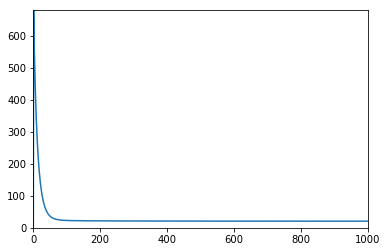

In [142]:
plt.plot(range(len(cost_history)), cost_history)
plt.axis([0, 1001, 0, np.max(cost_history)])
plt.show()

(113, 1)
(113, 1)
[[ 3.48294678e+00]
 [-3.18801880e-01]
 [ 2.02489090e-01]
 [ 1.30568638e+00]
 [ 2.15923309e+00]
 [ 1.81225967e-01]
 [ 2.81965828e+00]
 [-1.38536377e+00]
 [ 1.80125427e+00]
 [ 2.32425690e-02]
 [ 3.02872467e-01]
 [ 1.10094223e+00]
 [ 1.93404617e+00]
 [ 2.91113281e+00]
 [ 6.25211716e-01]
 [ 2.89370499e+00]
 [ 1.91354713e+00]
 [ 1.30604706e+00]
 [ 3.62247543e+00]
 [ 2.79612617e+00]
 [ 5.56140900e+00]
 [-9.09914017e-01]
 [-5.09601593e-01]
 [ 1.62228889e+00]
 [-3.72165680e-01]
 [-9.09252357e-01]
 [ 1.48100662e+00]
 [ 1.16430664e-01]
 [-7.91895676e-01]
 [-2.32137089e+00]
 [-1.95128059e-01]
 [ 3.72197075e+00]
 [ 5.83184433e+00]
 [-8.25389099e+00]
 [ 2.52977066e+00]
 [ 4.24992218e+00]
 [-8.55741997e+00]
 [-3.07071152e+00]
 [ 1.27077332e+00]
 [ 1.61617165e+00]
 [ 4.15986938e+00]
 [-5.29874039e-01]
 [ 7.25611115e+00]
 [ 7.41259842e+00]
 [ 3.24546890e+00]
 [-9.19040680e+00]
 [-1.03595894e+01]
 [ 3.71362762e+00]
 [-1.04874229e+00]
 [-6.84908676e+00]
 [ 4.54405441e+00]
 [ 1.39192505

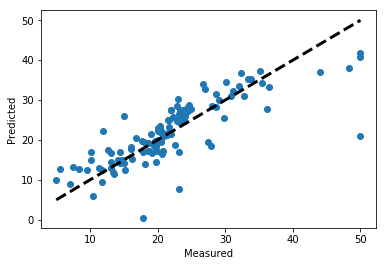

In [143]:
pred_y = sess.run(hypothesis, feed_dict={X: test_x})
print(pred_y.shape)
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print(test_y.shape)
print(pred_y - test_y)
print(test_y.shape)
print("MSE: %.4f" % sess.run(mse))

fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

## 3. pandas 이용한 데이터 다루기
<hr>
### (1) pandas 이용해서 데이터 살펴보기
#### sklearn data to pandas

**참고 페이지**: [pandas 공부하기](http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/02%20-%20Lesson.ipynb)

In [20]:
import pandas as pd
df = pd.read_csv('boston_house_prices_pd.csv')
# print(df)

df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
pd.read_csv?

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [22]:
df = pd.read_csv('boston_house_prices_pd.csv', header=None) # header가 있으므로 이 경우에는 pass
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
0     507 non-null object
1     507 non-null object
2     507 non-null object
3     507 non-null object
4     507 non-null object
5     507 non-null object
6     507 non-null object
7     507 non-null object
8     507 non-null object
9     507 non-null object
10    507 non-null object
11    507 non-null object
12    507 non-null object
13    507 non-null object
dtypes: object(14)
memory usage: 55.5+ KB


In [23]:
df.tail()
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


### (2) pandas 이용해서 linear regression 분석 따라하기
참고 페이지: [Medium_Learning data science_Linear Regression on Boston Housing Dataset](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef)

In [187]:
import tensorflow as tf
import pandas as pd

from sklearn import datasets

# from sklearn import cross_validation
from sklearn.model_selection import train_test_split 

In [188]:
boston = load_boston()

In [189]:
bos = pd.DataFrame(boston.data)
print(bos.head())

bos.columns = boston.feature_names
print(bos.head())

print(boston.target.shape)

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  

In [190]:
# target column 추가
bos['PRICE'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [191]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

#### Split train-test dataset

In [192]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
print(X)
print(Y)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

In [193]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


#### Linear Regression

In [194]:
from sklearn.linear_model import LinearRegression

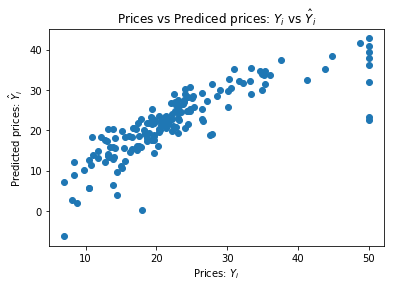

In [195]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Prediced prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

The above snippet will fit a model based on X_train and Y_train. Now we already got the linear model, we try to predict it to the X_test and now we got the prediction values which stored into Y_pred. To visualize the differences between actual prices and predicted values we also create a scatter plot.



#### To Visualize the differences between actual prices and predicted values we also create a scatter plot
실제 가격과 예측값의 차이를 시각화하기 위해 산점도를 작성

Ideally, the scatter plot should create a linear line. Since the model does not fit 100%, the scatter plot is not creating a linear line.
<br>

이상적으로, 산점도는 직선을 만들어야합니다. 모델이 100 %에 맞지 않으므로 분산 형 플롯은 선형 선을 생성하지 않습니다.

#### Mean squared Error
모형의 오차 수준을 확인하기 위해 평균 제곱 오차를 구할 수 있다. <- 오류의 제곱 평균을 측정하는 절차 중 하나 <br>
기본적으로 실제값과 예측값의 차이를 검사한다. 

In [196]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.541367275619


이는 모델이 실제로 대 선형 모델이 아니라는 것을 의미. <br>
#### Try understand how to know the value of acceptable mean squared error. <br>
받아들일 수 있는 평균제곱오류의 가치를 아는 법은?

In [197]:
from sklearn.metrics import explained_variance_score

In [200]:
print('R-Squre:', explained_variance_score(Y_test, Y_pred))

R-Squre: 0.7002835319751245


R-squre가 1에 가까울수록 좋다?

### 참고 Model Representaion - [Machine Learning] By Andrew Ng